# Test model example

In [1]:
import json
import sys
import os
import time
import neuron
from pathlib import Path

import matplotlib.pyplot as plt

import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import shutil

import model
import evaluator
import plotting

# %matplotlib notebook
%matplotlib inline

In [2]:
probe_type = "linear"
model_name = "hay_ais" #'hallermann' # "hay" hay_ais
model_folder = (Path(".") / f"{model_name}_model").absolute()

In [3]:
# compile model-specific mechanisms
if not (model_folder / "x86_64").is_dir():
    curr_dir = Path(".").absolute()
    os.chdir(model_folder)
    print(os.getcwd())
    os.system("nrnivmodl mechanisms")
    os.chdir(curr_dir)
else:
    print(f"Mechanisms already compiled for {model_name}")
    compiled_folder = Path("./x86_64")
    if compiled_folder.is_dir():
        shutil.rmtree(compiled_folder)
    shutil.copytree(model_folder / "x86_64", compiled_folder)

Mechanisms already compiled for hay_ais


In [4]:
cell = model.create(model_name=model_name, release=True)

# probe = model.define_electrode(probe_type=probe_type)
probe=None

param_names = [param.name for param in cell.params.values() if not param.frozen]

fitness_protocols = evaluator.define_protocols(
    model_name,
    feature_set="soma",
    feature_file=f"{model_name}_model/features_list.json",
    electrode=probe,
    protocols_with_lfp=["Step_AIS"] #["Step1", "bAP", "BAC", "EPSP", "CaBurst", ]
)

fitness_calculator = ephys.objectivescalculators.ObjectivesCalculator([])

if model_name == 'hallermann':
    sim = ephys.simulators.LFPySimulator(cell, cvode_active=False, electrode=probe)
else:
    sim = ephys.simulators.LFPySimulator(cell, cvode_active=True, electrode=probe)

eva = ephys.evaluators.CellEvaluator(                    
        cell_model=cell,                                                       
        param_names=param_names,                                                    
        fitness_protocols=fitness_protocols,                                        
        fitness_calculator=fitness_calculator,                                      
        sim=sim)

In [5]:
fitness_protocols
print(eva)

cell evaluator:
  cell model:
    hay_ais:
  morphology:
    hay_ais_model/morphology.asc
  mechanisms:
    pas.all: pas at ['all']
    Ca_LVAst.somatic: Ca_LVAst at ['somatic']
    Ca_HVA.somatic: Ca_HVA at ['somatic']
    SKv3_1.somatic: SKv3_1 at ['somatic']
    SK_E2.somatic: SK_E2 at ['somatic']
    K_Tst.somatic: K_Tst at ['somatic']
    K_Pst.somatic: K_Pst at ['somatic']
    Nap_Et2.somatic: Nap_Et2 at ['somatic']
    NaTa_t.somatic: NaTa_t at ['somatic']
    CaDynamics_E2.somatic: CaDynamics_E2 at ['somatic']
    Ih.somatic: Ih at ['somatic']
    Ih.apical: Ih at ['apical']
    SK_E2.apical: SK_E2 at ['apical']
    Ca_LVAst.apical: Ca_LVAst at ['apical']
    Ca_HVA.apical: Ca_HVA at ['apical']
    SKv3_1.apical: SKv3_1 at ['apical']
    NaTa_t.apical: NaTa_t at ['apical']
    Im.apical: Im at ['apical']
    CaDynamics_E2.apical: CaDynamics_E2 at ['apical']
    Ih.basal: Ih at ['basal']
    Ca_LVAst.hillockal: Ca_LVAst at ['hillockal']
    Ca_HVA.hillockal: Ca_HVA at ['hillocka

In [6]:
t_start = time.time()
responses = eva.run_protocols(protocols=fitness_protocols.values(), param_values={})
print(f"Elapsed time: {time.time() - t_start}")

23.500107710026263
27.343947784237788
31.187787858449312
35.03162793266084
38.87546800687235
42.71930808108388
46.56314815529541
50.40698822950692
54.25082830371845

|-|       hay_ais[0].soma[0](0-1)
   `--|       hay_ais[0].hillock(0-1)
       `--------|       hay_ais[0].ais(0-1)
                 `----|       hay_ais[0].myelin[0](0-1)
  `|       hay_ais[0].dend[0](0-1)
    `|       hay_ais[0].dend[1](0-1)
      `------|       hay_ais[0].dend[2](0-1)
      `|       hay_ais[0].dend[3](0-1)
        `----|       hay_ais[0].dend[4](0-1)
        `--------|       hay_ais[0].dend[5](0-1)
    `------|       hay_ais[0].dend[6](0-1)
  `|       hay_ais[0].dend[7](0-1)
    `|       hay_ais[0].dend[8](0-1)
      `|       hay_ais[0].dend[9](0-1)
      `--|       hay_ais[0].dend[10](0-1)
    `|       hay_ais[0].dend[11](0-1)
      `|       hay_ais[0].dend[12](0-1)
        `------|       hay_ais[0].dend[13](0-1)
        `------|       hay_ais[0].dend[14](0-1)
      `--|       hay_ais[0].dend[15](0-1)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                 `----|       hay_ais[0].apic[68](0-1)
                                                                    `------|       hay_ais[0].apic[69](0-1)
                                                                            `--|       hay_ais[0].apic[70](0-1)
                                                                            `--|       hay_ais[0].apic[71](0-1)
                                                                                `|       hay_ais[0].apic[72](0-1)
                                                                                `--|       hay_ais[0].apic[73](0-1)
                                                                    `|       hay_ais[0].apic[74](0-1)
                                                                      `--|       hay_ais[0].apic[75](0-1)
                                                                          `------|       hay_ais[0].apic[76](0-1)
                                                             

In [7]:
# eva.run_protocols(protocols=fitness_protocols.values(), param_values={})
# bluepyopt.ephys.models
# print(eva)
# create_hoc(param_values, ignored_globals=(), template='cell_template.jinja2', disable_banner=False, template_dir=None)
responses

{'Step1.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x2acb468642e0>,
 'Step1.hillock10.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x2acb468648b0>,
 'Step1.aisrec30.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x2acb46864dc0>}

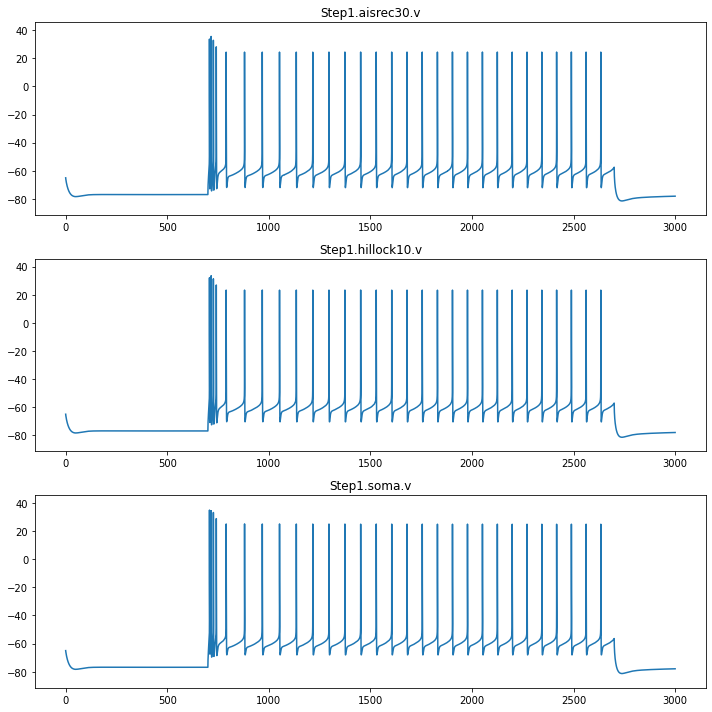

In [8]:
# r2={}
# r2['Step1.soma.v'] = responses['Step1.soma.v']
# plotting.plot_responses(r2)
plotting.plot_responses(responses)

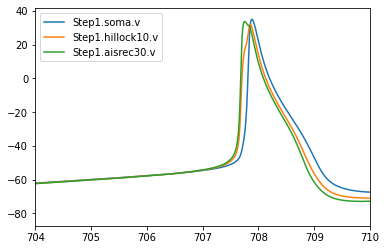

In [21]:
import matplotlib.pyplot as plt
plt.plot(responses['Step1.soma.v']['time'],responses['Step1.soma.v']['voltage'], label='Step1.soma.v')
plt.plot(responses['Step1.hillock10.v']['time'],responses['Step1.hillock10.v']['voltage'], label='Step1.hillock10.v')
plt.plot(responses['Step1.aisrec30.v']['time'],responses['Step1.aisrec30.v']['voltage'], label='Step1.aisrec30.v')
plt.xlim([704,710])
plt.legend()